In [1]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#import plotting
import numpy as np
import mpld3

/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std,X_test_std))
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

# Perceptron

In [4]:
ppn= Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [5]:
import analyze
an = analyze.analysis(X_test_std,y_test,ppn)
an.res_vs_fit()


Loading BokehJS ...

In [9]:
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %d" % (y_test != y_pred).sum())
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))
type(y_pred)

Misclassified samples: 4
Accuracy: 0.91


numpy.ndarray

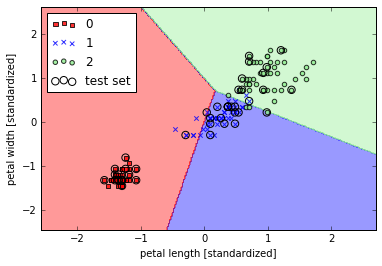

In [23]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plotting.plot_decision_regoins(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Logistic Regression

## Sigmoid function

In [24]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

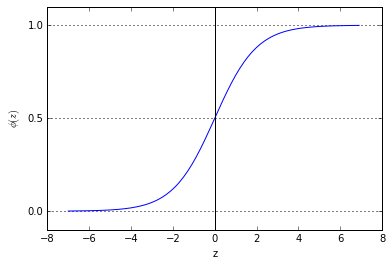

In [31]:
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0.0,1.0,facecolor='1.0',alpha=1.0,ls='dotted')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

## sklearn logistic regression

In [4]:
lr = LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)
#plotting.plot_decision_regoins(X=X_combined_std,y=y_combined,classifier=lr,test_idx=range(105,150))
##plt.xlabel('petal length [standardized]')
#plt.ylabel('petal width [standardized]')
#plt.legend(loc='upper left')
#plt.show()

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

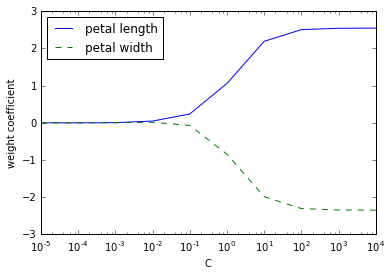

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
weights, params = [], []
for c in range(-5,5):
    lr = LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
ax.set_xscale('log')
plt.show()

# Support Vector Machines

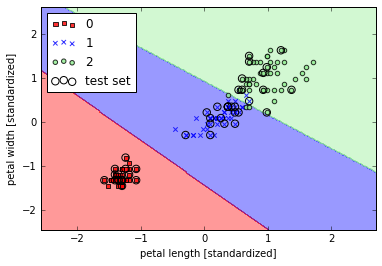

In [58]:
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)
plotting.plot_decision_regoins(X=X_combined_std,y=y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## Non-linear

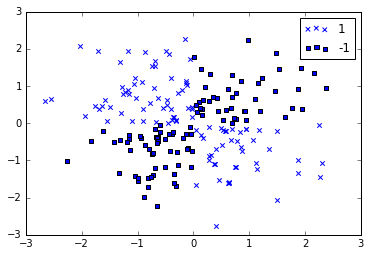

In [57]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='b',marker='s',label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()


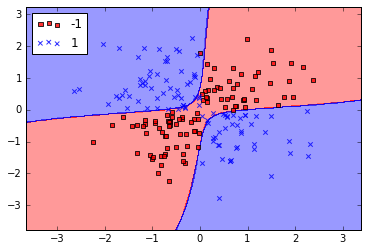

In [60]:
svm = SVC(kernel='rbf',C=10.0,random_state=0,gamma=0.1)
svm.fit(X_xor,y_xor)
plotting.plot_decision_regoins(X=X_xor,y=y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

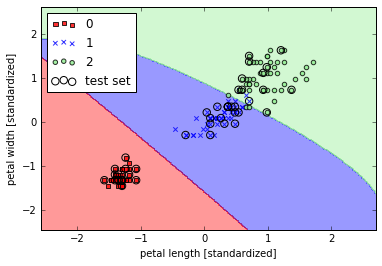

In [61]:
svm = SVC(kernel='rbf',C=1.0,random_state=0,gamma=0.2)
svm.fit(X_train_std,y_train)
plotting.plot_decision_regoins(X=X_combined_std,y=y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

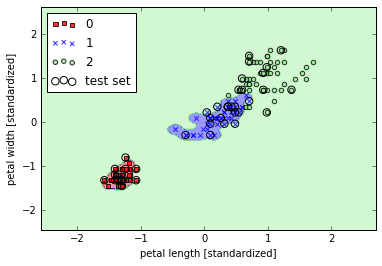

In [62]:
svm = SVC(kernel='rbf',C=1.0,random_state=0,gamma=100.0)
svm.fit(X_train_std,y_train)
plotting.plot_decision_regoins(X=X_combined_std,y=y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Decision Trees

## Classifiers

In [5]:
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))

def error(p):
    return 1-np.max([p,1-p])

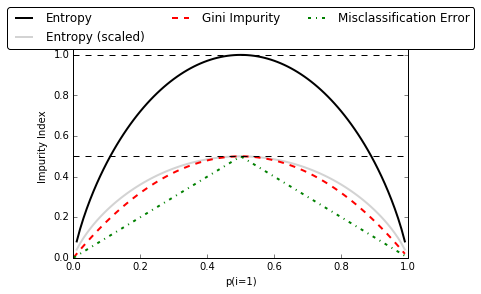

In [6]:
x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent,gini(x),err],
                          ['Entropy','Entropy (scaled)','Gini Impurity','Misclassification Error'],
                         ['-','-','--','-.'],['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label=lab, linestyle=ls,lw=2,color=c)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.15),ncol=3,fancybox=True,shadow=False)
ax.axhline(y=0.5,linewidth=1,color='k',linestyle='--')
ax.axhline(y=1.0,linewidth=1,color='k',linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## Decision Tree Construction

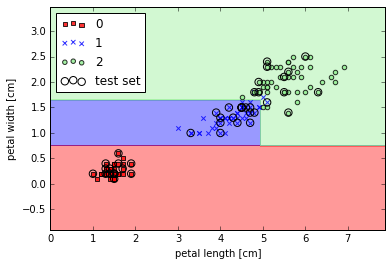

In [10]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)
plotting.plot_decision_regoins(X_combined,y_combined, classifier=tree,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## Random Forest

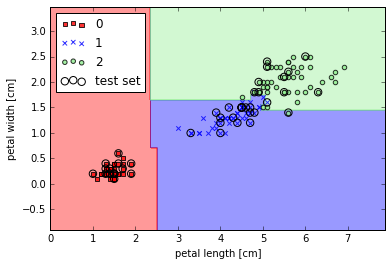

In [12]:
forest = RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)
plotting.plot_decision_regoins(X_combined,y_combined, classifier=forest,test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

# K-Nearest Neighbors

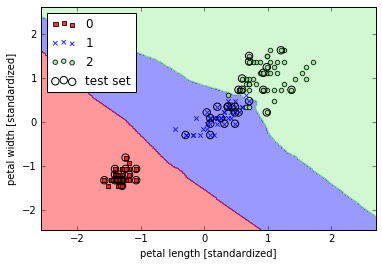

In [14]:
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plotting.plot_decision_regoins(X_combined_std,y_combined, classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

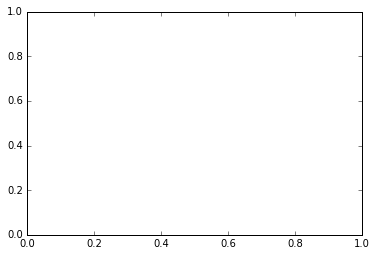

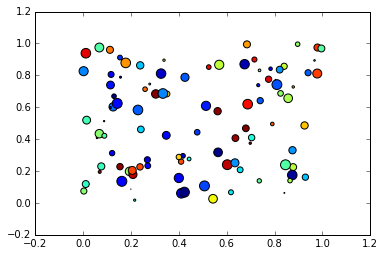

In [6]:
from matplotlib.pyplot import figure, show
import numpy as npy
from numpy.random import rand


if 1: # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)
    def onpick3(event):
        ind = event.ind
        print 'onpick3 scatter:', ind, npy.take(x, ind), npy.take(y, ind)

    fig = figure()
    ax1 = fig.add_subplot(111)
    col = ax1.scatter(x, y, 100*s, c, picker=True)
    #fig.savefig('pscoll.eps')
    fig.canvas.mpl_connect('pick_event', onpick3)

show()

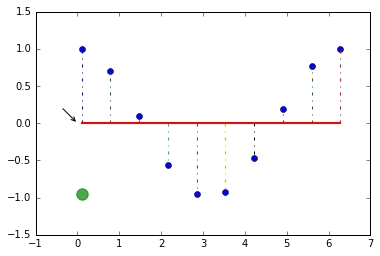

In [1]:
import matplotlib.pyplot as plt
import scipy.spatial as spatial
import numpy as np
pi = np.pi
cos = np.cos

def fmt(x, y):
    return 'x: {x:0.2f}\ny: {y:0.2f}'.format(x=x, y=y)

class FollowDotCursor(object):
    """Display the x,y location of the nearest data point.
    http://stackoverflow.com/a/4674445/190597 (Joe Kington)
    http://stackoverflow.com/a/13306887/190597 (unutbu)
    http://stackoverflow.com/a/15454427/190597 (unutbu)
    """
    def __init__(self, ax, x, y, tolerance=5, formatter=fmt, offsets=(-20, 20)):
        try:
            x = np.asarray(x, dtype='float')
        except (TypeError, ValueError):
            x = np.asarray(mdates.date2num(x), dtype='float')
        y = np.asarray(y, dtype='float')
        mask = ~(np.isnan(x) | np.isnan(y))
        x = x[mask]
        y = y[mask]
        self._points = np.column_stack((x, y))
        self.offsets = offsets
        y = y[np.abs(y-y.mean()) <= 3*y.std()]
        self.scale = x.ptp()
        self.scale = y.ptp() / self.scale if self.scale else 1
        self.tree = spatial.cKDTree(self.scaled(self._points))
        self.formatter = formatter
        self.tolerance = tolerance
        self.ax = ax
        self.fig = ax.figure
        self.ax.xaxis.set_label_position('top')
        self.dot = ax.scatter(
            [x.min()], [y.min()], s=130, color='green', alpha=0.7)
        self.annotation = self.setup_annotation()
        plt.connect('motion_notify_event', self)

    def scaled(self, points):
        points = np.asarray(points)
        return points * (self.scale, 1)

    def __call__(self, event):
        ax = self.ax
        # event.inaxes is always the current axis. If you use twinx, ax could be
        # a different axis.
        if event.inaxes == ax:
            x, y = event.xdata, event.ydata
        elif event.inaxes is None:
            return
        else:
            inv = ax.transData.inverted()
            x, y = inv.transform([(event.x, event.y)]).ravel()
        annotation = self.annotation
        x, y = self.snap(x, y)
        annotation.xy = x, y
        annotation.set_text(self.formatter(x, y))
        self.dot.set_offsets((x, y))
        bbox = ax.viewLim
        event.canvas.draw()

    def setup_annotation(self):
        """Draw and hide the annotation box."""
        annotation = self.ax.annotate(
            '', xy=(0, 0), ha = 'right',
            xytext = self.offsets, textcoords = 'offset points', va = 'bottom',
            bbox = dict(
                boxstyle='round,pad=0.5', fc='yellow', alpha=0.75),
            arrowprops = dict(
                arrowstyle='->', connectionstyle='arc3,rad=0'))
        return annotation

    def snap(self, x, y):
        """Return the value in self.tree closest to x, y."""
        dist, idx = self.tree.query(self.scaled((x, y)), k=1, p=1)
        try:
            return self._points[idx]
        except IndexError:
            # IndexError: index out of bounds
            return self._points[0]

fig, ax = plt.subplots()
x = np.linspace(0.1, 2*pi, 10)
y = cos(x)
markerline, stemlines, baseline = ax.stem(x, y, '-.')
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color','r', 'linewidth', 2)
cursor = FollowDotCursor(ax, x, y, tolerance=20)
plt.show()


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()


In [5]:
import test

In [6]:
test

<module 'test' from 'test.py'>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

def run_from_ipython():
    try:
        __IPYTHON__
        return True
    except NameError:
        return False


fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

if True:
    mpld3.display()

In [5]:
from bokeh.plotting import figure, ColumnDataSource, show
from bokeh.models import HoverTool
from bokeh.io import output_notebook
from collections import OrderedDict

def scatter_with_hover(x, y,
                       fig=None, name=None, marker='x',
                       fig_width=500, fig_height=500, **kwargs):
    """
    Plots an interactive scatter plot of `x` vs `y` using bokeh, with automatic
    tooltips showing columns from `df`.
    Parameters
    ----------
    x : str
        Name of the column to use for the x-axis values
    y : str
        Name of the column to use for the y-axis values
    fig : bokeh.plotting.Figure, optional
        Figure on which to plot (if not given then a new figure will be created)
    cols : list of str
        Columns to show in the hover tooltip (default is to show all)
    name : str
        Bokeh series name to give to the scattered data
    marker : str
        Name of marker to use for scatter plot
    **kwargs
        Any further arguments to be passed to fig.scatter
    Returns
    -------
    bokeh.plotting.Figure
        Figure (the same as given, or the newly created figure)
    Example
    -------
    fig = scatter_with_hover(df, 'A', 'B')
    show(fig)
    fig = scatter_with_hover(df, 'A', 'B', cols=['C', 'D', 'E'], marker='x', color='red')
    show(fig)
    Author
    ------
    Robin Wilson <robin@rtwilson.com>
    with thanks to Max Albert for original code example
    """
    # Make it so it works for ipython.
    output_notebook()
    # insert the correct hover identifier.
    hover = HoverTool(
            tooltips=[
                ("entry#", "@label"),
            ]
        )
    # If we haven't been given a Figure obj then create it with default
    # size etc.
    if fig is None:
        fig = figure(width=fig_width, height=fig_height, tools=['box_zoom', 'reset',hover])

    # We're getting data from the given dataframe
    source = ColumnDataSource(data=dict(x=x,y=y,label=range(1,len(x)+1)))

    # Actually do the scatter plot - the easy bit
    # (other keyword arguments will be passed to this function)
    fig.scatter('x', 'y', source=source, marker=marker, **kwargs)#

    show(fig)

In [6]:
scatter_with_hover(ppn.predict(X_test_std),y_test)

NameError: name 'ppn' is not defined

In [5]:
from analyze import analysis

In [6]:
anl = analysis(X_train,y_train,lr)

In [7]:
test_data = [-79.1778, 270.527, 196.501, 383.861, 513.393, 42.3732, 176.829,
    -169.238, 311.778, 309.698, 10.109, 225.056, 5.08744, 122.083,
    -56.7882, -66.3755, -53.0647, 139.82, 34.7369, 382.467, 213.764,
    340.885, 165.873, 49.2139, 46.841, 44.067, 108.928, -104.022, 574.78,
    511.884, -205.467, -86.4605, 277.937, 473.29, 448.986, 426.134,
    694.811, 364.762, 235.298, 246.213, 154.505, 68.7574, 61.4833,
    300.483, 266.701, 233.948, 376.869, 175.487, 427.539, 87.6686,
    273.541, 371.579, 387.108, 257.802, 33.3296, -273.413, 350.733,
    -20.6731, 350.834, 383.036, -66.0876, 21.8541, 163.174, 147.65,
    222.994, 346.855, 543.713, 72.0556, 721.673, 447.303, 482.739,
    523.758, 596.022, 214.072, 587.176, 8.20119, 499.036, 57.0369,
    126.134, 560.145, 82.5231, -42.8571, 338.563, 575.688, 255.257,
    497.89, 397.169, 323.949, 304.894, 628.549, 737.823, 41.2698, 57.652,
    -48.7028, 477.411, 147.134, 448.609, 313.448, 237.872, 575.203,
    270.732, 789.965, 371.919, 160.479, 775.847, 100.363, 242.233,
    465.281, 255.989, 344.78, 300.744, 661.128, 741.049, 622.824,
    348.724, 198.367, 355.96, 362.171, 521.402, 754.1, 255.524, 292.711,
    563.823, 616.171, 71.1998, 373.503, 289.188, 413.966, 429.168,
    246.295, 754.455, 430.702, 736.9, 726.256, 342.609, 888.31, 678.392,
    480.293, 366.9, 457.252, 796.67, 359.518, 950.33, 582.94, 541.066,
    299.007, 624.977, 556.276, 314.475, 645.92, 254.9, 826.828, 269.851,
    904.1, 760.407, 603.569, 1077.92, 544.979, 569.573, 769.081, 307.182,
    175.521, 104.786, 204.098, 576.655, 412.85, 518.278, 491.998,
    512.211, 747.434, 475.629, 964.751, 818.842, 763.565, 1285.83,
    487.754, 657.239, 864.728, 611.438, 851.36, 501.331, 644.555,
    539.338, 673.565, 723.69, 348.561, 558.114, 1208.35, 289.769,
    751.854, 246.156, 819.313, 560.874, 1038.81, 431.507, 1203.01,
    589.908, 705.851, 904.383, 801.775, 422.716, 831.992, 1036.7,
    415.981, 508.886, 655.725, 893.322, 423.426, 689.623, 787.636,
    944.105, 1050.02, 1075.21, 626.817, 665.71, 549.299, 980.685,
    788.009, 721.479, 913.52, 982.704, 1086.44, 1202.43, 804.378,
    1069.23, 980.781, 500.193, 853.887, 1077.72, 700.443, 327.598,
    882.489, 632.873, 1122.72, 592.743, 902.157, 837.643, 1230.12,
    784.89, 756.088, 745.287, 1003.85, 942.119, 1437.91, 400.614,
    1032.27, 839.267, 1140.62, 955.61, 1181.49]

In [8]:
dist = np.random.uniform(0,100,len(test_data))

/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2, right=2
  'left=%s, right=%s') % (left, right))


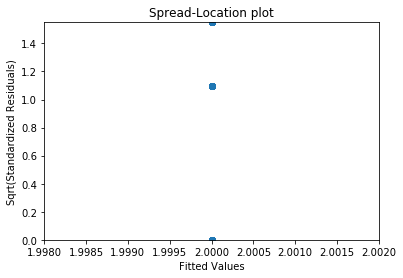

In [8]:
anl.Spread_Loc(interact=False)

In [11]:
max(dist)

99.450220858108935

In [9]:
np.random.normal(-273,1437,10)

array([-2399.78671201,   824.1330925 ,   120.86751344, -1010.58722011,
         414.01669792,   564.70308227, -1243.43048517,  -367.13141918,
       -1779.11028298, -1504.16786275])

In [11]:
max([max(dist),max(test_data)])

1437.91